# <font color=purple>**DATA MINING AND DATA WEREHOUSING PROJECT ^_^**</font>

---
<font color = purple> **1. Data exploration & Data cleaning <br>
    2. Data visualization <br>
    3. Algorithm implementation** <br> 
</font>


---
# <font color = purple>**1. Data exploration & Data cleaning**</font>

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
#from sklearn import svm
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv("Breast_Cancer_Clinical_Data_Project.tsv",sep='\t')

---
<font color = green>**Am importat tabelul**</font> <font color = red>**Breast Cancer Clinical Data**</font> <font color = green>**, care contine date dintr-un studiu realizat pe pacienti. Mi-am propus sa analizez datele si sa prezic statusul vital al pacientilor care sufera de cancer de san.**</font>

---

In [3]:
df.head(2)

Patient ID Sample ID   Cancer Study    Cancer Type  \
0    MB-0000   MB-0000  brca_metabric  Breast Cancer   
1    MB-0002   MB-0002  brca_metabric  Breast Cancer   

               Cancer Type Detailed  Number of Samples Per Patient  \
0  Breast Invasive Ductal Carcinoma                              1   
1  Breast Invasive Ductal Carcinoma                              1   

   Mutation Count Sample Type 3-Gene classifier subtype  Age at Diagnosis  \
0             NaN     Primary                 ER-/HER2-             75.65   
1             2.0     Primary     ER+/HER2- High Prolif             43.19   

   ... Overall Survival Status Pam50 + Claudin-low subtype  \
0  ...                  LIVING                 claudin-low   
1  ...                  LIVING                        LumA   

   Patient's Vital Status PR Status Primary Tumor Laterality Radio Therapy  \
0                  Living  Negative                    Right           YES   
1                  Living  Positive                    Right           YES   

  Tumor Other Histologic Subtype Tumor Size Tumor Stage Type of Breast Surgery  
0                     Ductal/NST       22.0         2.0             MASTECTOMY  
1                     Ductal/NST       10.0         1.0      BREAST CONSERVING  

[2 rows x 35 columns]

In [4]:
df.shape

(2509, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 35 columns):
Patient ID                        2509 non-null object
Sample ID                         2509 non-null object
Cancer Study                      2509 non-null object
Cancer Type                       2509 non-null object
Cancer Type Detailed              2374 non-null object
Number of Samples Per Patient     2509 non-null int64
Mutation Count                    2357 non-null float64
Sample Type                       2509 non-null object
3-Gene classifier subtype         1764 non-null object
Age at Diagnosis                  2498 non-null float64
Cellularity                       1917 non-null object
Chemotherapy                      1980 non-null object
Cohort                            2498 non-null float64
ER Status                         2469 non-null object
ER status measured by IHC         2426 non-null object
HER2 Status                       1980 non-null object
HER2 status

In [6]:
df.describe()

Number of Samples Per Patient  Mutation Count  Age at Diagnosis  \
count                         2509.0     2357.000000       2498.000000   
mean                             1.0        5.578702         60.420300   
std                              0.0        3.967967         13.032997   
min                              1.0        1.000000         21.930000   
25%                              1.0        3.000000         50.920000   
50%                              1.0        5.000000         61.110000   
75%                              1.0        7.000000         70.000000   
max                              1.0       80.000000         96.290000   

            Cohort  Lymph nodes examined positive  Neoplasm Histologic Grade  \
count  2498.000000                    2243.000000                2388.000000   
mean      2.900320                       1.950513                   2.412060   
std       1.962216                       4.017774                   0.649363   
min       1.000000                       0.000000                   1.000000   
25%       1.000000                       0.000000                   2.000000   
50%       3.000000                       0.000000                   3.000000   
75%       4.000000                       2.000000                   3.000000   
max       9.000000                      45.000000                   3.000000   

       Nottingham prognostic index  Overall Survival (Months)   Tumor Size  \
count                  2287.000000                1981.000000  2360.000000   
mean                      4.028787                 125.244271    26.220093   
std                       1.189092                  76.111772    15.370883   
min                       1.000000                   0.000000     1.000000   
25%                       3.048000                  60.866667    17.000000   
50%                       4.044000                 116.466667    22.410000   
75%                       5.040000                 185.133333    30.000000   
max                       7.200000                 355.200000   182.000000   

       Tumor Stage  
count  1788.000000  
mean      1.713647  
std       0.655307  
min       0.000000  
25%       1.000000  
50%       2.000000  
75%       2.000000  
max       4.000000

In [7]:
df.columns

Index(['Patient ID', 'Sample ID', 'Cancer Study', 'Cancer Type',
       'Cancer Type Detailed', 'Number of Samples Per Patient',
       'Mutation Count', 'Sample Type', '3-Gene classifier subtype',
       'Age at Diagnosis', 'Cellularity', 'Chemotherapy', 'Cohort',
       'ER Status', 'ER status measured by IHC', 'HER2 Status',
       'HER2 status measured by SNP6', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Lymph nodes examined positive', 'Neoplasm Histologic Grade',
       'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status',
       'Pam50 + Claudin-low subtype', 'Patient's Vital Status', 'PR Status',
       'Primary Tumor Laterality', 'Radio Therapy',
       'Tumor Other Histologic Subtype', 'Tumor Size', 'Tumor Stage',
       'Type of Breast Surgery'],
      dtype='object')

In [8]:
for col in df.columns: 
    print(col) 
    
#am aranjat coloanele asa ca sa vedem (mai ordonat) de care avem nevoie mai departe

Patient ID
Sample ID
Cancer Study
Cancer Type
Cancer Type Detailed
Number of Samples Per Patient
Mutation Count
Sample Type
3-Gene classifier subtype
Age at Diagnosis
Cellularity
Chemotherapy
Cohort
ER Status
ER status measured by IHC
HER2 Status
HER2 status measured by SNP6
Hormone Therapy
Inferred Menopausal State
Integrative Cluster
Lymph nodes examined positive
Neoplasm Histologic Grade
Nottingham prognostic index
Oncotree Code
Overall Survival (Months)
Overall Survival Status
Pam50 + Claudin-low subtype
Patient's Vital Status
PR Status
Primary Tumor Laterality
Radio Therapy
Tumor Other Histologic Subtype
Tumor Size
Tumor Stage
Type of Breast Surgery


In [9]:
df.isna().sum()

#am numarat NaN pentru fiecare coloana

Patient ID                          0
Sample ID                           0
Cancer Study                        0
Cancer Type                         0
Cancer Type Detailed              135
Number of Samples Per Patient       0
Mutation Count                    152
Sample Type                         0
3-Gene classifier subtype         745
Age at Diagnosis                   11
Cellularity                       592
Chemotherapy                      529
Cohort                             11
ER Status                          40
ER status measured by IHC          83
HER2 Status                       529
HER2 status measured by SNP6      529
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Lymph nodes examined positive     266
Neoplasm Histologic Grade         121
Nottingham prognostic index       222
Oncotree Code                     135
Overall Survival (Months)         528
Overall Survival Status           528
Pam50 + Clau

In [10]:
df.isna().sum().sum()

#double check Nan

11057

In [11]:
df.drop(['Patient ID','Cancer Study', 'Number of Samples Per Patient', 'Sample ID', 'Cohort', 'ER status measured by IHC', 'HER2 status measured by SNP6', 'Integrative Cluster', 'Oncotree Code', 'Pam50 + Claudin-low subtype', 'Sample Type'], axis=1, inplace=True)

---
<font color = green>
Am sters coloanele care nu ne folosesc pe mai departe:
<br>
Patient ID & Sample ID > nu avem nevoie fiindca avem Index 
<br>
Cancer Study > aceeasi valoare pentru toate datele din tabel 
<br>
Number of Samples > aceeasi valoare 1 pentru toate datele din tabel
<br>
Cohort, Integrative Cluster, Oncotree Code, Pam50 > nu sunt relevante
<br>
ER & HER2 > avem alte coloane despre valorile acestor receptori pentru hromoni (cele doua coloane prezentau date conditionate de anumite tehnici de analiza medicala)
<br>
Sample Type > aceeasi valoare pentru toate datele din tabel
</font>

---

In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
df.dtypes

Cancer Type                        object
Cancer Type Detailed               object
Mutation Count                    float64
3-Gene classifier subtype          object
Age at Diagnosis                  float64
Cellularity                        object
Chemotherapy                       object
ER Status                          object
HER2 Status                        object
Hormone Therapy                    object
Inferred Menopausal State          object
Lymph nodes examined positive     float64
Neoplasm Histologic Grade         float64
Nottingham prognostic index       float64
Overall Survival (Months)         float64
Overall Survival Status            object
Patient's Vital Status             object
PR Status                          object
Primary Tumor Laterality           object
Radio Therapy                      object
Tumor Other Histologic Subtype     object
Tumor Size                        float64
Tumor Stage                       float64
Type of Breast Surgery            

---
### <font color = green> M-am uitat la datele pe care vrem sa le prezicem: starea vitala a pacientului - LIVING vs. DIED. </font>
---

In [14]:
print(df['Overall Survival Status'].unique())

['LIVING' 'DECEASED' nan]


In [15]:
print(df["Patient's Vital Status"].unique())

['Living' 'Died of Disease' 'Died of Other Causes' nan]


---
### <font color = green> Voi pastra pentru analiza numai coloana cu "Patient's Vital Status" -> "Vital Status", avand informatii comune cu "Overall Survival Status" </font>

---

In [16]:
df.drop(['Overall Survival Status'], axis=1, inplace=True)

In [17]:
df.rename(columns={"Patient's Vital Status": "Vital Status"}, inplace=True)

In [18]:
print(df["Vital Status"].isna().sum())

529


---
### <font color = green> Stergem rows cu valori NaN pentru coloana "Vital Status" ca sa nu influenteze rezultatul final. </font>
---


In [19]:
df.dropna(subset=["Vital Status"], inplace=True)

In [20]:
print(df["Vital Status"].isna().sum())

0


---
### <font color = green> Stergem si rows <font color = black> Died of Other Causes <font color = green> fiindca sunt date care nu reflectat legatura dintre cancer si starea vitala, iar din analiza anterioara vedem ca aceste date scad acuratetea predictiei. </font>
---


In [21]:
doc = df[df['Vital Status'] == 'Died of Other Causes'].index
df.drop(doc, inplace=True)

In [22]:
print(df["Vital Status"].unique())

['Living' 'Died of Disease']


In [23]:
df.shape

#am verificat care este dimensiunea finala a tabelului pe care realizam analiza

(1483, 23)

---
### <font color = green> Inainte sa merg mai departe, inlocuiesc STRINGS cu VALORI NUMERICE intregi. Voi realiza o analiza comparativa intre algoritmul SLIQ si Decision Tree din libraria scikit-learn. Acesta librarie nu suporta momentan variabile categorice, acesta fiind motivul pentru care facem aceasta modificare.</font>
---


In [24]:
df["Vital Status"] = df["Vital Status"].map({'Died of Disease':0, 'Living':1})

In [25]:
df.isna().sum()

Cancer Type                         0
Cancer Type Detailed               33
Mutation Count                     99
3-Gene classifier subtype         158
Age at Diagnosis                    0
Cellularity                        49
Chemotherapy                        0
ER Status                           0
HER2 Status                         0
Hormone Therapy                     0
Inferred Menopausal State           0
Lymph nodes examined positive      60
Neoplasm Histologic Grade          49
Nottingham prognostic index         0
Overall Survival (Months)           0
Vital Status                        0
PR Status                           0
Primary Tumor Laterality           82
Radio Therapy                       0
Tumor Other Histologic Subtype     33
Tumor Size                         17
Tumor Stage                       353
Type of Breast Surgery             18
dtype: int64

In [26]:
print(df["Cancer Type Detailed"].nunique())

6


In [27]:
print(df['Cancer Type Detailed'].value_counts())

Breast Invasive Ductal Carcinoma             1166
Breast Mixed Ductal and Lobular Carcinoma     144
Breast Invasive Lobular Carcinoma             107
Breast Invasive Mixed Mucinous Carcinoma       17
Breast                                         15
Metaplastic Breast Cancer                       1
Name: Cancer Type Detailed, dtype: int64


In [28]:
print(df.groupby(['Cancer Type','Cancer Type Detailed']).size())

#verific legatura intre informatiile celor doua coloane

Cancer Type     Cancer Type Detailed                     
Breast Cancer   Breast                                         15
                Breast Invasive Ductal Carcinoma             1165
                Breast Invasive Lobular Carcinoma             107
                Breast Invasive Mixed Mucinous Carcinoma       17
                Breast Mixed Ductal and Lobular Carcinoma     144
                Metaplastic Breast Cancer                       1
Breast Sarcoma  Breast Invasive Ductal Carcinoma                1
dtype: int64


In [29]:
print(df.groupby(['Cancer Type']).agg({'Cancer Type Detailed': lambda x: x.isnull().sum()}))

                Cancer Type Detailed
Cancer Type                         
Breast Cancer                     31
Breast Sarcoma                     2


---
<font color = green> "Cancer Type" are numai 2 variabile, dintre care "Breast Sarcoma" = 3, iar pentru "Cancer Type Detailed" 2 dintre cele 3 sunt NaN </font>

<font color = green> => Cel mai bine stergem coloana "Cancer Type" si redenumim coloana "Cancer Type Detailed" = "Breast Cancer Type" fiindca ofera mai multe informatii. </font>

---

In [30]:
df.drop(['Cancer Type'], axis=1, inplace=True)

In [31]:
df.rename(columns={"Cancer Type Detailed": "Breast Cancer Type"}, inplace=True)

In [32]:
df['Breast Cancer Type'].fillna('Breast', inplace=True)

# am inlocuit toate valorile NaN cu "Breast", fiindca in tabel exista trecut acest tip de cancer pentru toate rows care nu aveau infos suplimentare

In [33]:
df.groupby(['Breast Cancer Type']).size()

Breast Cancer Type
Breast                                         48
Breast Invasive Ductal Carcinoma             1166
Breast Invasive Lobular Carcinoma             107
Breast Invasive Mixed Mucinous Carcinoma       17
Breast Mixed Ductal and Lobular Carcinoma     144
Metaplastic Breast Cancer                       1
dtype: int64

In [34]:
df.groupby(['3-Gene classifier subtype']).size()

# am analizat coloana fiindca, din practica, datele se compun din rezultatele receptorilor pentru hormoni ER si HER2
# avem date pentru receptori in tabel si am vrut sa vad legatura dintre aceste date

3-Gene classifier subtype
ER+/HER2- High Prolif    445
ER+/HER2- Low Prolif     446
ER-/HER2-                261
HER2+                    173
dtype: int64

In [35]:
df['3-Gene classifier subtype'].isna().sum()

158

In [36]:
df.groupby(['3-Gene classifier subtype', 'ER Status'])['ER Status'].count()

# am cautat sa vad legatura cu 'ER Status'

3-Gene classifier subtype  ER Status
ER+/HER2- High Prolif      Negative       9
                           Positive     436
ER+/HER2- Low Prolif       Negative       9
                           Positive     437
ER-/HER2-                  Negative     223
                           Positive      38
HER2+                      Negative     106
                           Positive      67
Name: ER Status, dtype: int64

In [37]:
df.groupby(['3-Gene classifier subtype', 'HER2 Status'])['HER2 Status'].count()

# am cautat sa vad legatura cu 'HER2 Status'

3-Gene classifier subtype  HER2 Status
ER+/HER2- High Prolif      Negative       424
                           Positive        21
ER+/HER2- Low Prolif       Negative       441
                           Positive         5
ER-/HER2-                  Negative       250
                           Positive        11
HER2+                      Negative        14
                           Positive       159
Name: HER2 Status, dtype: int64

---
<font color= green> 
Mai jos am vrut sa vad valoarea "3-Gene classifier subtype" in functie de valorile ER, HER2 si PR.
    <br><br>
Ce inseamna fiecare? > estrogen receptor (ER), progesterone receptor (PR), human epidermal growth factor receptor (HER2)
     <br><br>
Din tabelul de mai jos se poate vedea ca in coloana "3-Gene classifier subtype" exista discordante compartaiv cu celelalte 3 coloane. 
    
Mai concret, ca exemplu, in practica nu putem avea ER+ cu status negativ pentru ER si pentru PR. 
</font>

---

In [38]:
df.groupby(['3-Gene classifier subtype','ER Status', 'PR Status', 'HER2 Status'])['ER Status', 'PR Status', 'HER2 Status'].count()

ER Status  \
3-Gene classifier subtype ER Status PR Status HER2 Status              
ER+/HER2- High Prolif     Negative  Negative  Negative             7   
                                              Positive             1   
                                    Positive  Negative             1   
                          Positive  Negative  Negative           149   
                                              Positive             9   
                                    Positive  Negative           267   
                                              Positive            11   
ER+/HER2- Low Prolif      Negative  Negative  Negative             8   
                                    Positive  Negative             1   
                          Positive  Negative  Negative            96   
                                              Positive             3   
                                    Positive  Negative           336   
                                              Positive             2   
ER-/HER2-                 Negative  Negative  Negative           206   
                                              Positive             9   
                                    Positive  Negative             7   
                                              Positive             1   
                          Positive  Negative  Negative            27   
                                              Positive             1   
                                    Positive  Negative            10   
HER2+                     Negative  Negative  Negative             3   
                                              Positive            98   
                                    Positive  Negative             1   
                                              Positive             4   
                          Positive  Negative  Negative             8   
                                              Positive            35   
                                    Positive  Negative             2   
                                              Positive            22   

                                                           PR Status  \
3-Gene classifier subtype ER Status PR Status HER2 Status              
ER+/HER2- High Prolif     Negative  Negative  Negative             7   
                                              Positive             1   
                                    Positive  Negative             1   
                          Positive  Negative  Negative           149   
                                              Positive             9   
                                    Positive  Negative           267   
                                              Positive            11   
ER+/HER2- Low Prolif      Negative  Negative  Negative             8   
                                    Positive  Negative             1   
                          Positive  Negative  Negative            96   
                                              Positive             3   
                                    Positive  Negative           336   
                                              Positive             2   
ER-/HER2-                 Negative  Negative  Negative           206   
                                              Positive             9   
                                    Positive  Negative             7   
                                              Positive             1   
                          Positive  Negative  Negative            27   
                                              Positive             1   
                                    Positive  Negative            10   
HER2+                     Negative  Negative  Negative             3   
                                              Positive            98   
                                    Positive  Negative             1   
                                              Positive             4   
                          

In [39]:
df['ER Status'] = df['ER Status'].mask(pd.isna, df['3-Gene classifier subtype'])

# am vrut sa ma folosesc de coloana "3-Gene..." ca sa completez NaN in "ER Status"

In [40]:
print(df['ER Status'].unique())

# am vruts sa verific daca se regesesc valorile din "3-Gene..." in coloana "Er Status", 
# dar se pare ca nu au existata valori nule pe "ER Status" in timp ce in "3-Gene..." sa existe valori

['Positive' 'Negative']


In [41]:
df['PR Status'] = df['PR Status'].mask(pd.isna, df['3-Gene classifier subtype'])

# aceeasi explicatie ca mai sus 

In [42]:
print(df['PR Status'].unique())

['Negative' 'Positive']


In [43]:
df['HER2 Status'].fillna(df['3-Gene classifier subtype'], inplace=True)

# ca mai sus, dar am incercat alta sintaxa

In [44]:
print(df['HER2 Status'].unique())

['Negative' 'Positive']


---
### <font color=green>Am sters coloana "3-Gene..." fiindca e o suma a rezultatelor de pe ER, HER2, PR, coloane care oricum sunt mai complete.</font>

---

In [45]:
df.drop(['3-Gene classifier subtype'], axis=1, inplace=True)

In [46]:
print(df.isna().sum())

Breast Cancer Type                  0
Mutation Count                     99
Age at Diagnosis                    0
Cellularity                        49
Chemotherapy                        0
ER Status                           0
HER2 Status                         0
Hormone Therapy                     0
Inferred Menopausal State           0
Lymph nodes examined positive      60
Neoplasm Histologic Grade          49
Nottingham prognostic index         0
Overall Survival (Months)           0
Vital Status                        0
PR Status                           0
Primary Tumor Laterality           82
Radio Therapy                       0
Tumor Other Histologic Subtype     33
Tumor Size                         17
Tumor Stage                       353
Type of Breast Surgery             18
dtype: int64


In [47]:
print(df['Cellularity'].value_counts())

# am amalizat ce date avem pe coloana "Cellularity", stiind ca nu e de tip numeric

High        726
Moderate    548
Low         160
Name: Cellularity, dtype: int64


In [48]:
print(df.groupby(["Neoplasm Histologic Grade", "Cellularity"])["Cellularity"].count())

# pentru completarea NaN in coloana "Cellularity", am analizat corelatia cu "Neoplasm Histologic Grade", stiind din practica ca au o oarecare dependenta

Neoplasm Histologic Grade  Cellularity
1.0                        High            46
                           Low             17
                           Moderate        47
2.0                        High           259
                           Low             55
                           Moderate       222
3.0                        High           407
                           Low             78
                           Moderate       258
Name: Cellularity, dtype: int64


---
### <font color = green> Daca ne uitam la valorile "Cellularity" in functie de "Neoplasm Histologic Grade", vedem ca spentru gradul 2 si 3, celularitatea are cele mai multe inregistrari pentru cazuri in care are valori "High". Numai pentru gradul 1, numarul de inregistrari "High" si "Moderate" sunt apropiate ca valori. <br> Transformam coloana "Cellularity" in float, pentru analiza viitoare. NaN vor fi inlocuite ulterior. </font>

---

In [49]:
df['Cellularity'] = df['Cellularity'].map({'Low': 0, 'Moderate': 1, 'High':2})

---
### <font color = purple> **Pentru toate coloanele care au valori "object", le transformam in valori numerice.** </font>

---

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1483 entries, 0 to 1982
Data columns (total 21 columns):
Breast Cancer Type                1483 non-null object
Mutation Count                    1384 non-null float64
Age at Diagnosis                  1483 non-null float64
Cellularity                       1434 non-null float64
Chemotherapy                      1483 non-null object
ER Status                         1483 non-null object
HER2 Status                       1483 non-null object
Hormone Therapy                   1483 non-null object
Inferred Menopausal State         1483 non-null object
Lymph nodes examined positive     1423 non-null float64
Neoplasm Histologic Grade         1434 non-null float64
Nottingham prognostic index       1483 non-null float64
Overall Survival (Months)         1483 non-null float64
Vital Status                      1483 non-null int64
PR Status                         1483 non-null object
Primary Tumor Laterality          1401 non-null object
Radio T

In [51]:
print(df['Inferred Menopausal State'].value_counts())

# am analizat coloana, stiind ca nu e de tip numeric

Post    1080
Pre      403
Name: Inferred Menopausal State, dtype: int64


In [52]:
df['Inferred Menopausal State'] = df['Inferred Menopausal State'].map({'Pre': 1, 'Post': 0})

# am inlocuit STRINGS cu valori numerice

In [53]:
print(df['Inferred Menopausal State'].unique())

[0 1]


In [54]:
print(df['Chemotherapy'].unique())

['NO' 'YES']


In [55]:
df['Chemotherapy'] = df['Chemotherapy'].map({'NO': 0, 'YES': 1})

In [56]:
print(df['Hormone Therapy'].unique())

['YES' 'NO']


In [57]:
df['Hormone Therapy'] = df['Hormone Therapy'].map({'NO': 0, 'YES': 1})

In [58]:
print(df['Radio Therapy'].unique())

['YES' 'NO']


In [59]:
df['Radio Therapy'] = df['Radio Therapy'].map({'NO': 0, 'YES': 1})

In [60]:
print(df['ER Status'].unique())

['Positive' 'Negative']


In [61]:
df['ER Status'] = df['ER Status'].map({'Negative': 0, 'Positive': 1})

In [62]:
print(df['HER2 Status'].unique())

['Negative' 'Positive']


In [63]:
df['HER2 Status'] = df['HER2 Status'].map({'Negative': 0, 'Positive': 1})

In [64]:
print(df['PR Status'].unique())

['Negative' 'Positive']


In [65]:
df['PR Status'] = df['PR Status'].map({'Negative': 0, 'Positive': 1})

In [66]:
print(df['Tumor Other Histologic Subtype'].unique())

# in analiza viitoare, nu e o coloana care sa ne ajute foarte mult, mai ales ca focusul e pe alte informatii din dataset
# o putem sterge

['Ductal/NST' 'Mixed' 'Lobular' 'Tubular/ cribriform' nan 'Mucinous'
 'Medullary' 'Other' 'Metaplastic']


In [67]:
df.drop(['Tumor Other Histologic Subtype'], axis=1, inplace=True)

In [68]:
print(df['Primary Tumor Laterality'].unique())

['Right' 'Left' nan]


In [69]:
print(df.groupby(['Primary Tumor Laterality'])['Primary Tumor Laterality'].count())

Primary Tumor Laterality
Left     722
Right    679
Name: Primary Tumor Laterality, dtype: int64


In [70]:
df['Primary Tumor Laterality'] = df['Primary Tumor Laterality'].map({'Right': 0, 'Left': 1})

In [71]:
print(df['Type of Breast Surgery'].unique())

['MASTECTOMY' 'BREAST CONSERVING' nan]


In [72]:
df['Type of Breast Surgery'] = df['Type of Breast Surgery'].map({'MASTECTOMY': 1, 'BREAST CONSERVING': 0})

In [73]:
print(df.groupby(['Type of Breast Surgery'])['Type of Breast Surgery'].count())

Type of Breast Surgery
0.0    623
1.0    842
Name: Type of Breast Surgery, dtype: int64


In [74]:
print(df['Breast Cancer Type'].unique())

['Breast Invasive Ductal Carcinoma'
 'Breast Mixed Ductal and Lobular Carcinoma'
 'Breast Invasive Lobular Carcinoma' 'Breast'
 'Breast Invasive Mixed Mucinous Carcinoma' 'Metaplastic Breast Cancer']


In [75]:
df['Breast Cancer Type'] = df['Breast Cancer Type'].map({'Breast': 0, 'Breast Invasive Ductal Carcinoma': 1, 'Breast Mixed Ductal and Lobular Carcinoma': 2, 'Breast Invasive Lobular Carcinoma': 3, 'Breast Invasive Mixed Mucinous Carcinoma': 4, 'Metaplastic Breast Cancer':5})

In [76]:
df.shape

(1483, 20)

In [77]:
df = df.round(0)

In [78]:
df.reset_index(drop=True)

Breast Cancer Type  Mutation Count  Age at Diagnosis  Cellularity  \
0                      1             NaN              76.0          NaN   
1                      1             2.0              43.0          2.0   
2                      1             2.0              49.0          2.0   
3                      2             1.0              48.0          1.0   
4                      2             2.0              77.0          2.0   
...                  ...             ...               ...          ...   
1478                   1             5.0              57.0          2.0   
1479                   1             2.0              59.0          2.0   
1480                   3             4.0              43.0          2.0   
1481                   1             6.0              43.0          2.0   
1482                   1             4.0              63.0          2.0   

      Chemotherapy  ER Status  HER2 Status  Hormone Therapy  \
0                0          1            0                1   
1                0          1            0                1   
2                1          1            0                1   
3                1          1            0                1   
4                1          1            0                1   
...            ...        ...          ...              ...   
1478             0          1            0                1   
1479             0          1            0                1   
1480             0          1            0                1   
1481             0          1            1                0   
1482             0          1            0                1   

      Inferred Menopausal State  Lymph nodes examined positive  \
0                             0                           10.0   
1                             1                            0.0   
2                             1                            1.0   
3                             1                            3.0   
4                             0                            8.0   
...                         ...                            ...   
1478                          0                            1.0   
1479                          0                            1.0   
1480                          1                            1.0   
1481                          1                            1.0   
1482                          0                           45.0   

      Neoplasm Histologic Grade  Nottingham prognostic index  \
0                           3.0                          6.0   
1                           3.0                          4.0   
2                           2.0                          4.0   
3                           2.0                          4.0   
4                           3.0                          6.0   
...                         ...                          ...   
1478                        3.0                          5.0   
1479                        2.0                          4.0   
1480                        3.0                          5.0   
1481                        3.0                          5.0   
1482                        3.0                          6.0   

      Overall Survival (Months)  Vital Status  PR Status  \
0                         140.0             1          0   
1                          85.0             1          1   
2                         164.0             0          1   
3                         165.0             1          1   
4                          41.0             0          1   
...                         ...           ...        ...   
1478                      199.0             1          1   
1479                       83.0             0          1   
1480                      197.0             1          1   
1481                       45.0             0          0   
1482                      176.0             0          1   

      Primary Tumor Laterality  Radio Therapy  Tumor Size  Tumor 

In [79]:
df.isna().sum()

Breast Cancer Type                 0
Mutation Count                    99
Age at Diagnosis                   0
Cellularity                       49
Chemotherapy                       0
ER Status                          0
HER2 Status                        0
Hormone Therapy                    0
Inferred Menopausal State          0
Lymph nodes examined positive     60
Neoplasm Histologic Grade         49
Nottingham prognostic index        0
Overall Survival (Months)          0
Vital Status                       0
PR Status                          0
Primary Tumor Laterality          82
Radio Therapy                      0
Tumor Size                        17
Tumor Stage                      353
Type of Breast Surgery            18
dtype: int64

---
### <font color = purple> **Analiza NaN** </font>

---

In [80]:
import missingno as msno

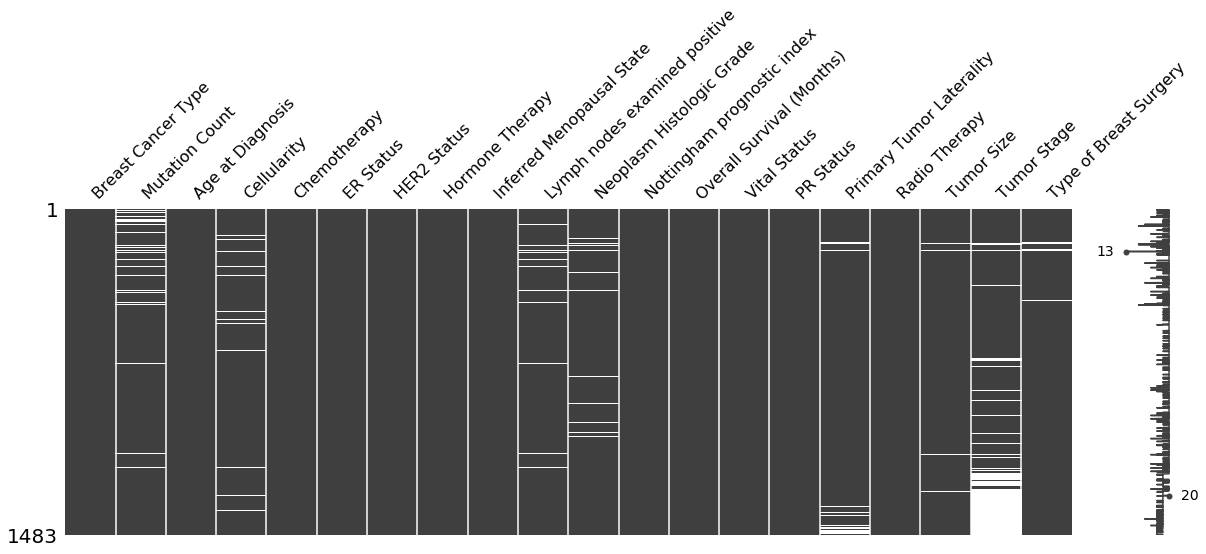

In [81]:
msno.matrix(df, figsize = (20, 6))

In [82]:
missing_columns = ["Mutation Count", "Cellularity", "Lymph nodes examined positive", "Neoplasm Histologic Grade", "Primary Tumor Laterality", "Tumor Size", "Tumor Stage", "Type of Breast Surgery"]

---
### <font color = green> **Am utilizat Simple Imputer pentru a completa NaN pe toate coloanele.** </font>

---

In [83]:
import numpy as np
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

imp_median.fit(df[["Mutation Count", "Cellularity", "Lymph nodes examined positive", "Neoplasm Histologic Grade", "Primary Tumor Laterality", "Tumor Size", "Tumor Stage", "Type of Breast Surgery"]].dropna())

SimpleImputer()

X = df[["Mutation Count", "Cellularity", "Lymph nodes examined positive", "Neoplasm Histologic Grade", "Primary Tumor Laterality", "Tumor Size", "Tumor Stage", "Type of Breast Surgery"]]
print(imp_median.transform(X))

[[ 5.  2. 10. ... 22.  2.  1.]
 [ 2.  2.  0. ... 10.  1.  0.]
 [ 2.  2.  1. ... 15.  2.  1.]
 ...
 [ 4.  2.  1. ... 25.  2.  0.]
 [ 6.  2.  1. ... 20.  2.  1.]
 [ 4.  2. 45. ... 25.  2.  1.]]


In [84]:
df[["Mutation Count", "Cellularity", "Lymph nodes examined positive", "Neoplasm Histologic Grade", "Primary Tumor Laterality", "Tumor Size", "Tumor Stage", "Type of Breast Surgery"]] = imp_median.transform(X)

In [85]:
df.isna().sum()

Breast Cancer Type               0
Mutation Count                   0
Age at Diagnosis                 0
Cellularity                      0
Chemotherapy                     0
ER Status                        0
HER2 Status                      0
Hormone Therapy                  0
Inferred Menopausal State        0
Lymph nodes examined positive    0
Neoplasm Histologic Grade        0
Nottingham prognostic index      0
Overall Survival (Months)        0
Vital Status                     0
PR Status                        0
Primary Tumor Laterality         0
Radio Therapy                    0
Tumor Size                       0
Tumor Stage                      0
Type of Breast Surgery           0
dtype: int64

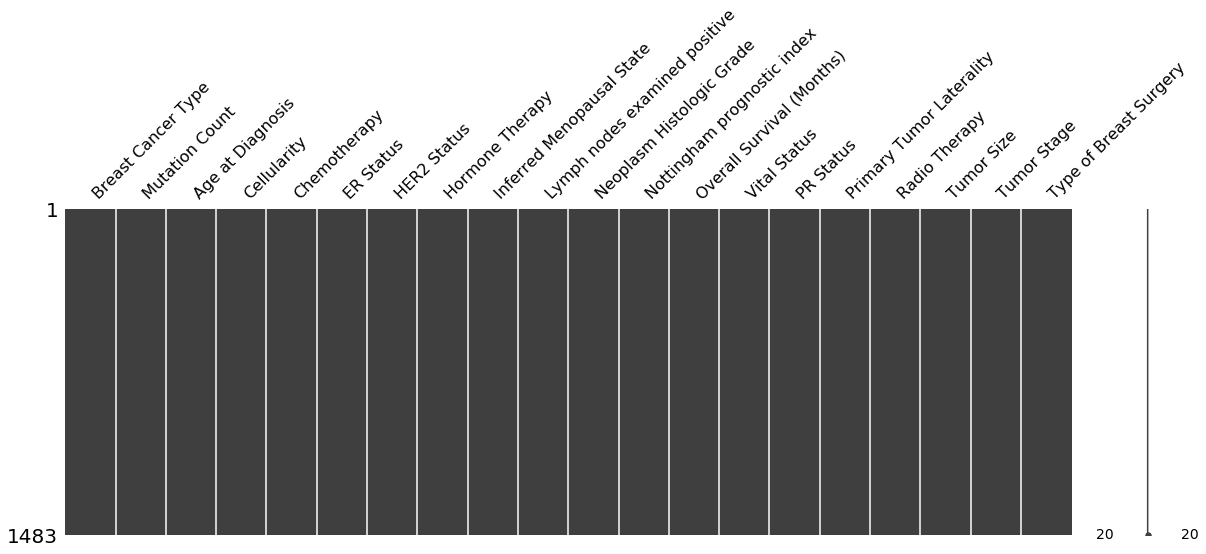

In [86]:
msno.matrix(df, figsize = (20, 6))

---
# <font color=purple>**2. Data Visualization**</font>

---

[Text(0, 0, 'Breast'),
 Text(0, 0, 'Breast Invasive Ductal Carcinoma'),
 Text(0, 0, 'Breast Mixed Ductal and Lobular Carcinoma'),
 Text(0, 0, 'Breast Invasive Lobular Carcinoma'),
 Text(0, 0, 'Breast Invasive Mixed Mucinous Carcinoma'),
 Text(0, 0, 'Metaplastic Breast Cancer')]

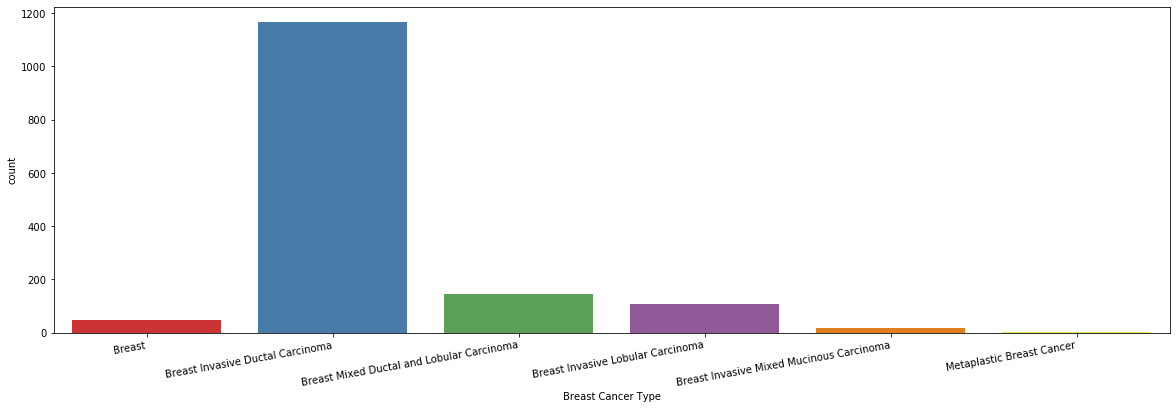

In [87]:
plt.figure(figsize=(20, 6))
chart = sns.countplot(x='Breast Cancer Type',data=df, palette='Set1')
chart.set_xticklabels(['Breast', 'Breast Invasive Ductal Carcinoma', 'Breast Mixed Ductal and Lobular Carcinoma', 'Breast Invasive Lobular Carcinoma', 'Breast Invasive Mixed Mucinous Carcinoma', 'Metaplastic Breast Cancer'], rotation=10, horizontalalignment='right')

#### <font color = green> Am observat ca cele mai multe intregistrari sunt pentru pacientii cu *Breast Invasive Ductal Carcinoma*. *Metaplastic Breast Cancer* reprezinta un outlier, pe care il vom trata mai tarziu. </font>

Text(0.5, 0, 'Age of Diagnosis')

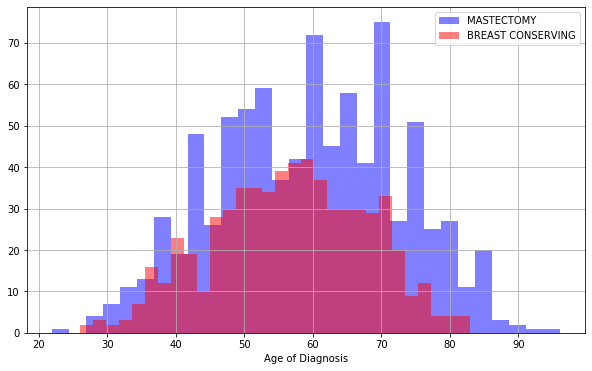

In [88]:
plt.figure(figsize=(10,6))
df[df['Type of Breast Surgery']==1]['Age at Diagnosis'].hist(alpha=0.5,color='blue',
                                              bins=30,label='MASTECTOMY')
df[df['Type of Breast Surgery']==0]['Age at Diagnosis'].hist(alpha=0.5,color='red',
                                              bins=30,label='BREAST CONSERVING')
plt.legend()
plt.xlabel('Age of Diagnosis')

#### <font color = green> Am cautat o corelatie intre *Type of Breast Surgery* si *Age of Diagnosis*. Cele mai multe date sunt pentru paciente cu varsta intre 40 si 70 de ani. Un numar mult mai mic au suferit o operatie *Breast Conserving*, aproximativ 1 treime din total. In ceea ce priveste operatia *Mastectomy*, are mai multe peaks, fiind bimodala. </font>

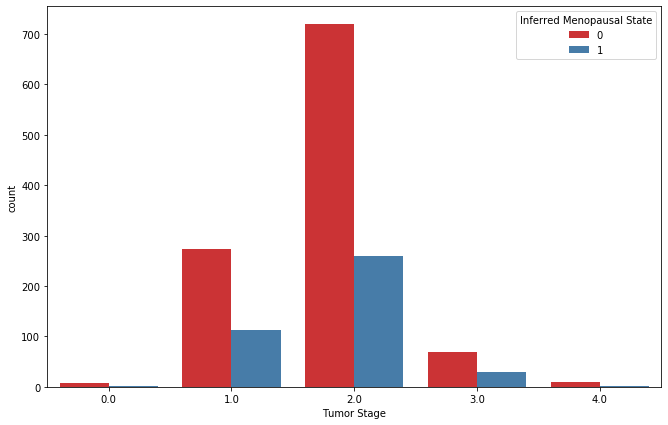

In [89]:
plt.figure(figsize=(11,7))
sns.countplot(x='Tumor Stage', hue='Inferred Menopausal State', data=df, palette='Set1')

#### <font color = green> Am observat din acest plot ca cele mai multe date sunt pentru femei post-menopauza (valoarea 0). Mai mult de jumatate au o tumora in stadiul 2. Un numar foarte mic de date sunt pentru cancer in stadii 0 sau 4. </font>

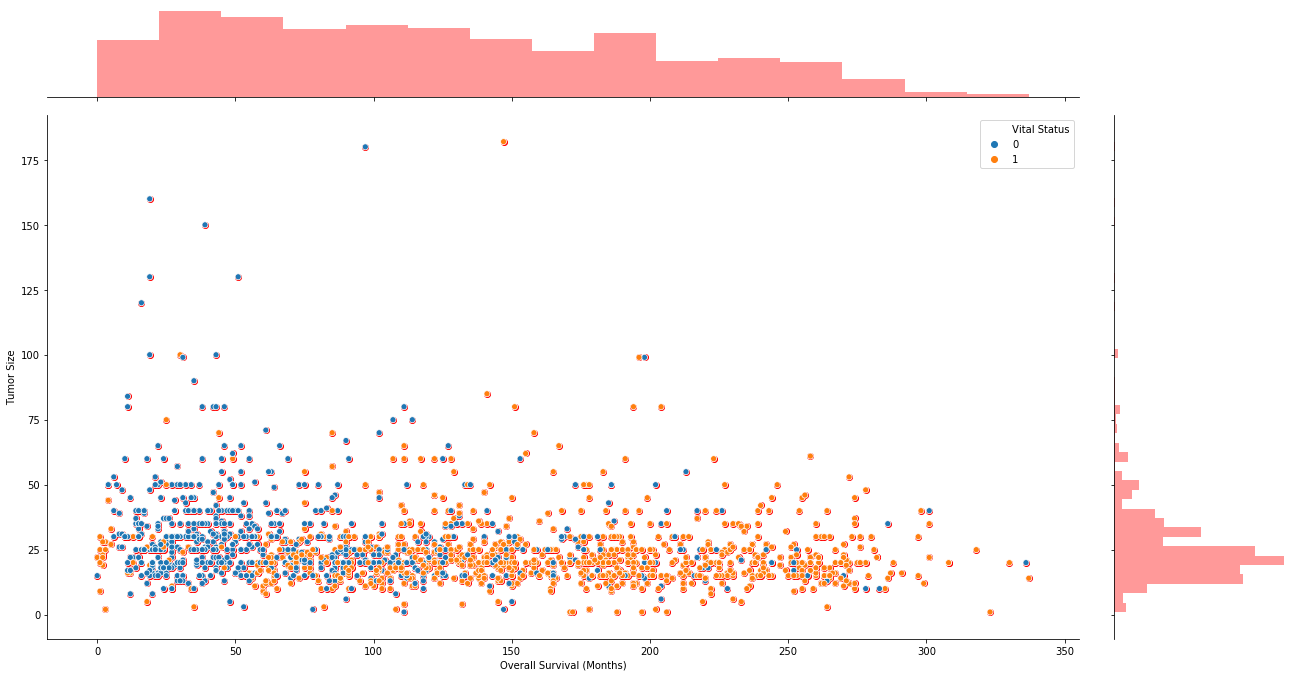

In [90]:
grid = sns.jointplot(x="Overall Survival (Months)", y="Tumor Size", data=df, color='red')
grid.fig.set_figwidth(20)
grid.fig.set_figheight(10)
g = grid.plot_joint(sns.scatterplot, hue="Vital Status", data=df)

#### <font color = green> Se observa ca majoritatea tumorilor au o dimensiune de maxim 50, restul valorilor fiind outliers. Nu exista o corelatie stransa intre dimensiunea tumorii si supravietuire, dat fiind ca avem pacienti cu tumori de peste 20 care au supravietuit mai mult de 250 de luni. In ceea ce priveste *Vital Status*, cei mai multi dintre pacientii care au decedat din cauza bolii, au decedat in primele 100-150 de luni, indiferent de dimensiunea tumorii. </font>

<Figure size 2160x1440 with 0 Axes>

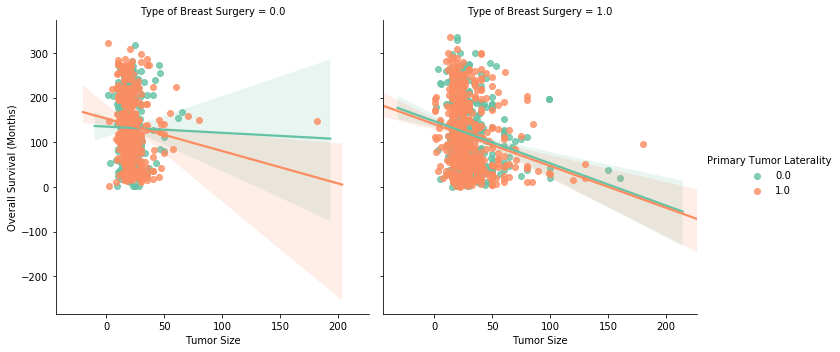

In [91]:
plt.figure(figsize=(30,20))
sns.lmplot(y="Overall Survival (Months)", x='Tumor Size', data=df, hue='Primary Tumor Laterality',
           col='Type of Breast Surgery',palette='Set2')

#### <font color = green> *Primary Tumor Laterality* nu influenteaza tipul operatiei, sau rata de supravietuire. </font>

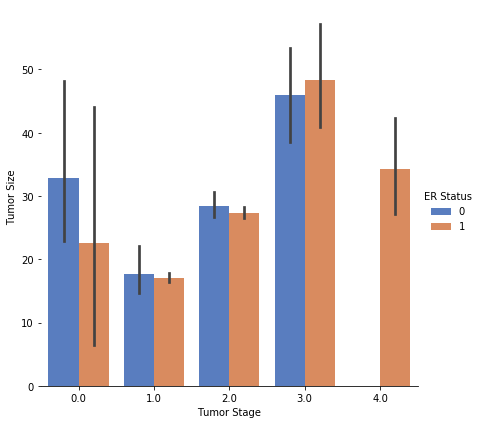

In [92]:
er = sns.catplot(x="Tumor Stage", y="Tumor Size", hue="ER Status", data=df,
                height=6, kind="bar", palette="muted")
er.despine(left=True)
er.set_ylabels("Tumor Size")

#### <font color = green> *ER Status* ia valori pozitive si negative in toate stadiile tumorii, mai putin in stadiul 4, cand nu prezint valori negative. In stadiul 3 sunt tumorile cele mai mari dintre toate stadiile.</font>

#### <font color = green> Mai jos am analizat valorile tuturor celor 3 receptori hormonali in functie de stadiul tumorii si de dimensiunea tumorii. Avem valori pozitive si negative pentru toti cei 3, cu exceptia *ER Status* in stadiul 4. Desi in stadiul 4 nu avem ER- , PR- se manifesta marcant atunci.</font>

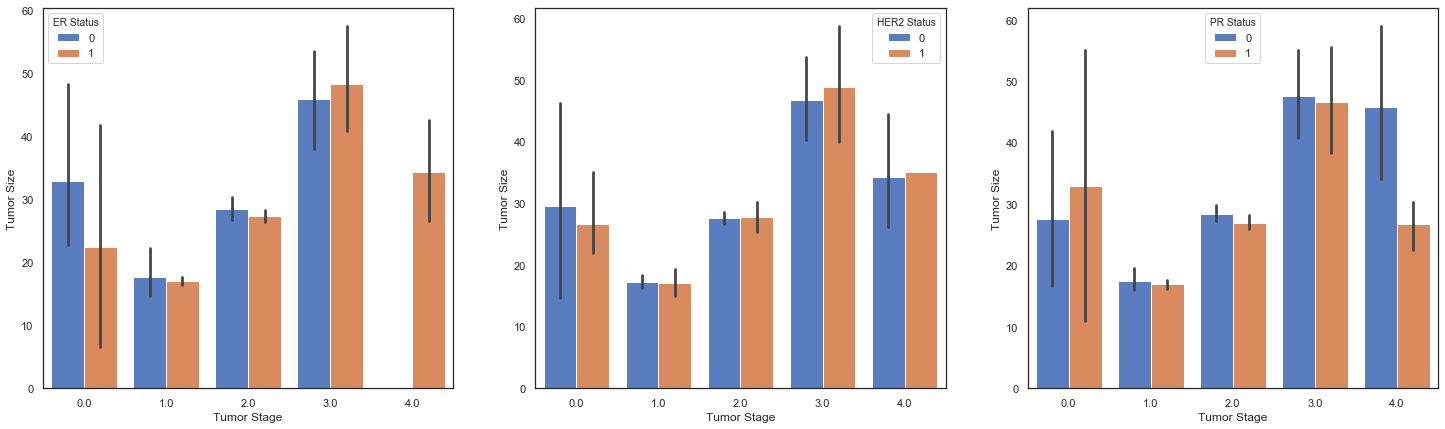

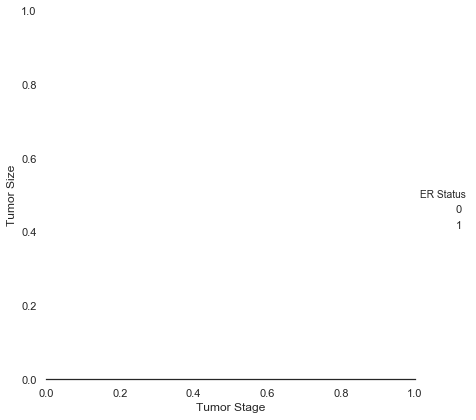

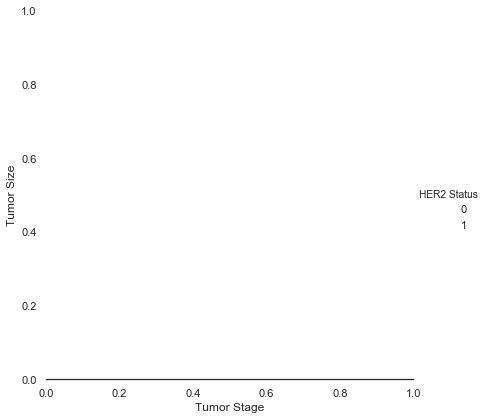

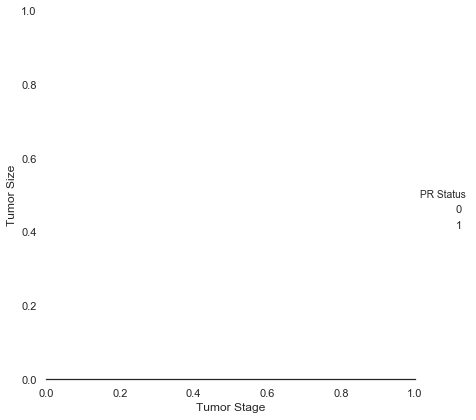

In [93]:
sns.set(style="white", palette="muted", color_codes=True)

fig, axs = plt.subplots(ncols=3, figsize=(25,7))

er = sns.catplot(x="Tumor Stage", y="Tumor Size", hue="ER Status", data=df,
                height=6, kind="bar", palette="muted", ax=axs[0])
er.despine(left=True)
er.set_ylabels("Tumor Size")

her = sns.catplot(x="Tumor Stage", y="Tumor Size", hue="HER2 Status", data=df,
                height=6, kind="bar", palette="muted", ax=axs[1])
her.despine(left=True)
her.set_ylabels("Tumor Size")

pr = sns.catplot(x="Tumor Stage", y="Tumor Size", hue="PR Status", data=df,
                height=6, kind="bar", palette="muted", ax=axs[2])
pr.despine(left=True)
pr.set_ylabels("Tumor Size")

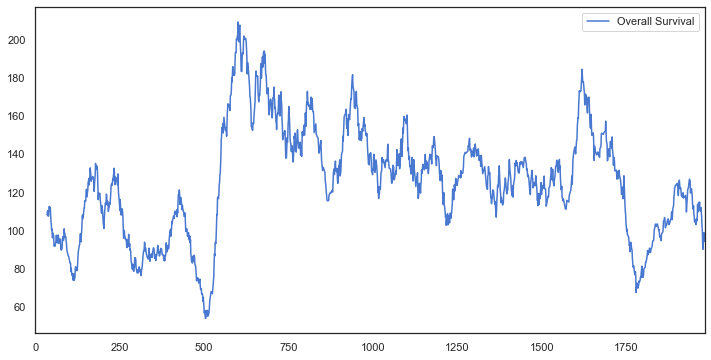

In [94]:
plt.figure(figsize=(12,6))
df["Overall Survival (Months)"].iloc[0:].rolling(window=30).mean().plot(label='Overall Survival')
plt.legend()

#### <font color = green> Cei mai multi pacienti au trait in medie intre 150 si 200 de luni.</font>

In [95]:
print(df["Age at Diagnosis"].round(0).unique())


[76. 43. 49. 48. 77. 79. 56. 70. 84. 85. 71. 45. 51. 67. 63. 52. 69. 61.
 50. 65. 44. 78. 47. 66. 46. 54. 37. 40. 60. 83. 72. 59. 74. 62. 57. 73.
 58. 80. 53. 68. 64. 38. 39. 75. 55. 41. 42. 30. 34. 82. 92. 33. 35. 81.
 87. 96. 26. 36. 31. 29. 22. 28. 27. 32. 90. 86.]


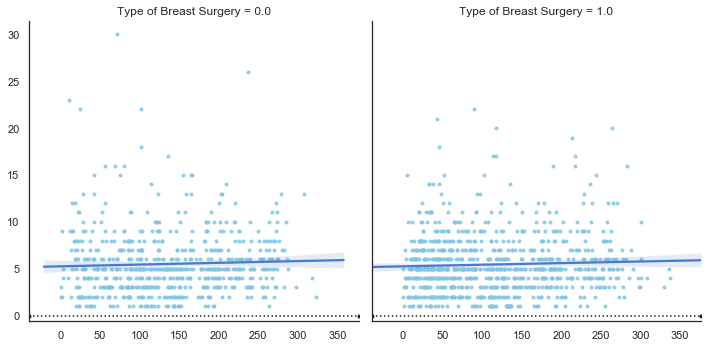

In [96]:
g = sns.lmplot("Overall Survival (Months)", "Mutation Count" ,col='Type of Breast Surgery', data=df,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, color="k", ls=":");

#### <font color = green> *Mutation Count* nu influenteaza rata de supravietuire sau tipul de operatie.</font>

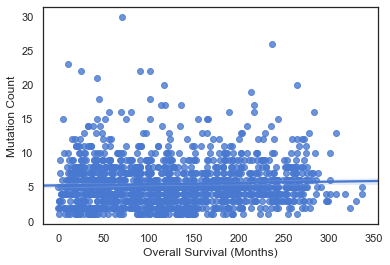

In [97]:
sns.regplot(x="Overall Survival (Months)", y="Mutation Count", data=df)

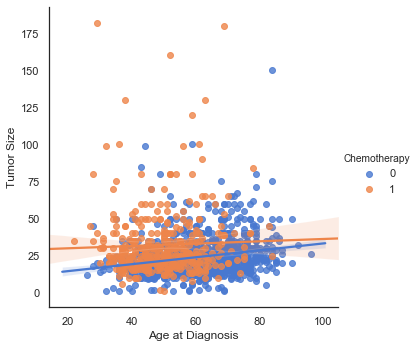

In [98]:
sns.lmplot(data=df,
           x='Age at Diagnosis',
           y='Tumor Size',
           hue='Chemotherapy')

#### <font color = green> Am observat ca cei mai multi pacienti care au urmat *Chemotherapy* au varsta pana in 60 de ani. Majoritatea care au avut dimensiuni mari ale tumorii au urmat *Chemotherapy*. Cu cat varsta e mai inaintata, cu atat varianta de tratament nu exista. </font>

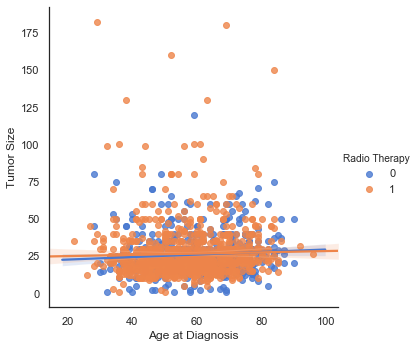

In [99]:
sns.lmplot(data=df,
           x='Age at Diagnosis',
           y='Tumor Size',
           hue='Radio Therapy')

#### <font color = green> Comparativ cu *Chemotherapy*, pacientii au urmat *Radio Therapy* independent de varsta. Si in acest caz, dimensiunea tumorii a impus aceasta varianta de tratament. </font>

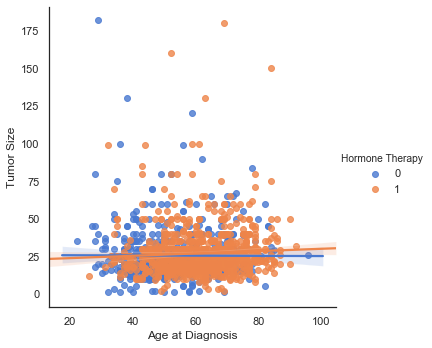

In [100]:
sns.lmplot(data=df,
           x='Age at Diagnosis',
           y='Tumor Size',
           hue='Hormone Therapy')

#### <font color = green> Si in cazul *Hormone Therapy*, pacientii au urmat tratamentul indiferent de varsta. Ce e diferit fata de celelalte variante de tratament, sunt mai multi pacienti cu tumori de dimensiuni mari care au urmat acest tip de tratament. </font>

In [101]:
print(df.groupby(['Breast Cancer Type', 'Inferred Menopausal State'])["Overall Survival (Months)"].count())

# pacientii cu "Breast Invasive Ductal Carcinoma" post-menopauza au o rata mare de supravietuire, conform tabelului, , insa nu e foarte relevant, fiindca cei mai multi au fost diagnosticati cu acest tip  

Breast Cancer Type  Inferred Menopausal State
0                   0                             40
                    1                              8
1                   0                            825
                    1                            341
2                   0                            113
                    1                             31
3                   0                             87
                    1                             20
4                   0                             14
                    1                              3
5                   0                              1
Name: Overall Survival (Months), dtype: int64


In [102]:
print(df.groupby(['Breast Cancer Type', "Vital Status", 'Chemotherapy'])['Chemotherapy'].count())

# se poate observa ca sunt multi pacienti care au decedat, desi au urmat tratament cu chimioterapie

Breast Cancer Type  Vital Status  Chemotherapy
0                   0             0                 7
                                  1                 3
                    1             0                33
                                  1                 5
1                   0             0               341
                                  1               178
                    1             0               480
                                  1               167
2                   0             0                58
                                  1                 7
                    1             0                68
                                  1                11
3                   0             0                36
                                  1                11
                    1             0                54
                                  1                 6
4                   0             0                 4
                    1             0

In [103]:
df.groupby(['Breast Cancer Type', "Vital Status"]).count()

# exista o inregistrare pentru 'Metaplastic Breast Cancer', pacientul fiind "Died of Disease"

# vom sterge inregistrarea deoarece reprezinta OUTLIER

Mutation Count  Age at Diagnosis  \
Breast Cancer Type Vital Status                                     
0                  0                         10                10   
                   1                         38                38   
1                  0                        519               519   
                   1                        647               647   
2                  0                         65                65   
                   1                         79                79   
3                  0                         47                47   
                   1                         60                60   
4                  0                          4                 4   
                   1                         13                13   
5                  0                          1                 1   

                                 Cellularity  Chemotherapy  ER Status  \
Breast Cancer Type Vital Status                                         
0                  0                      10            10         10   
                   1                      38            38         38   
1                  0                     519           519        519   
                   1                     647           647        647   
2                  0                      65            65         65   
                   1                      79            79         79   
3                  0                      47            47         47   
                   1                      60            60         60   
4                  0                       4             4          4   
                   1                      13            13         13   
5                  0                       1             1          1   

                                 HER2 Status  Hormone Therapy  \
Breast Cancer Type Vital Status                                 
0                  0                      10               10   
                   1                      38               38   
1                  0                     519              519   
                   1                     647              647   
2                  0                      65               65   
                   1                      79               79   
3                  0                      47               47   
                   1                      60               60   
4                  0                       4                4   
                   1                      13               13   
5                  0                       1                1   

                                 Inferred Menopausal State  \
Breast Cancer Type Vital Status                              
0                  0                                    10   
                   1                                    38   
1                  0                                   519   
                   1                                   647   
2                  0                                    65   
                   1                                    79   
3                  0                                    47   
                   1                                    60   
4                  0                                     4   
                   1                                    13   
5                  0                                     1   

                                 Lymph nodes examined positive  \
Breast Cancer Type Vital Status                                  
0                  0                                        10   
                   1                                        38   
1                  0                                       519   
                   1                                       647   
2                  0                                        65   
                   1                                        79   
3   

In [104]:
i = df[df['Breast Cancer Type'] == 5].index

In [105]:
df.drop(i, inplace=True) 

In [106]:
df.shape

(1482, 20)

---
### <font color = green> Mai sus am sters OUTLIER-ul. <br> Mai jos am analizat corealtiile dintre coloane. </font>

---

In [107]:
correlations= df.corr()

In [108]:
correlations = correlations["Vital Status"].sort_values(ascending=False)
correlations

Vital Status                     1.000000
Overall Survival (Months)        0.518213
PR Status                        0.086449
Inferred Menopausal State        0.059323
ER Status                        0.051108
Radio Therapy                    0.046513
Hormone Therapy                 -0.007005
Breast Cancer Type              -0.007776
Cellularity                     -0.019927
Primary Tumor Laterality        -0.050578
Mutation Count                  -0.061302
Chemotherapy                    -0.093289
HER2 Status                     -0.107803
Age at Diagnosis                -0.156346
Neoplasm Histologic Grade       -0.163150
Type of Breast Surgery          -0.179613
Tumor Size                      -0.209120
Tumor Stage                     -0.227282
Lymph nodes examined positive   -0.254214
Nottingham prognostic index     -0.279469
Name: Vital Status, dtype: float64

(0, 20)

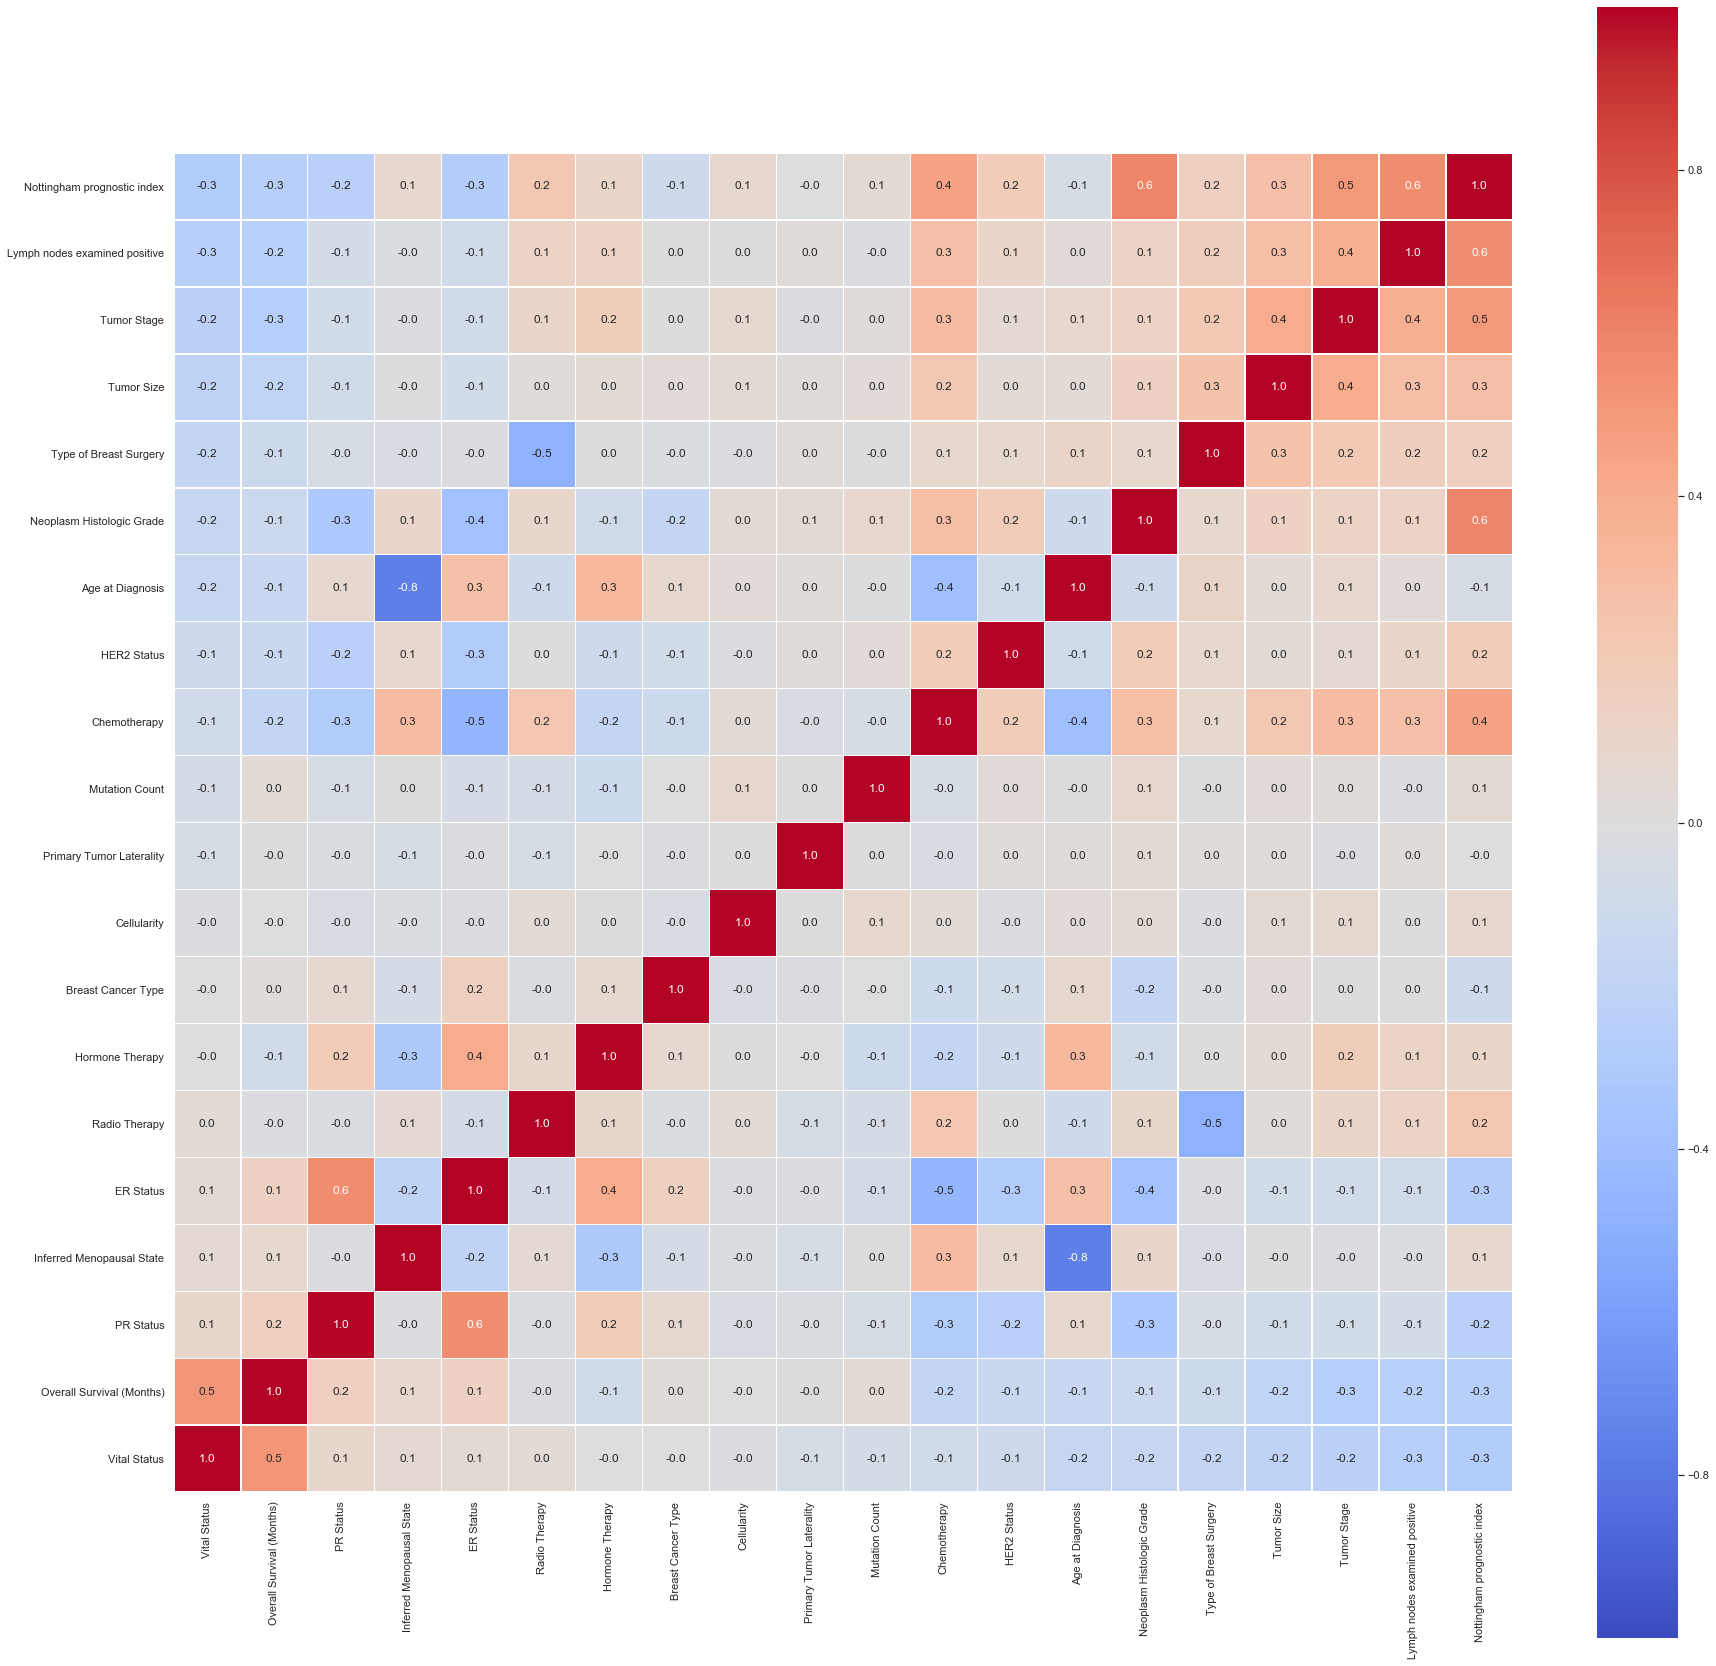

In [109]:
features= correlations.index[0:]
f,ax= plt.subplots(figsize=(30,30))
sns.heatmap(df.loc[:,features].corr(), annot=True, linewidths=.5, fmt='.1f', cmap='coolwarm', square=True, vmin=-1, vmax=1)
ax.set_ylim((0,20))

#### <font color = green> Nu avem foarte mult corelatii mari intre date. Nu exista valori mai mari de *0.6* </font>

In [110]:
df.shape

(1482, 20)

---
# <font color=purple>**3. Algorithm implementation**</font>
---

# <font color=purple>**Normalizare**</font>

In [111]:
df.columns

Index(['Breast Cancer Type', 'Mutation Count', 'Age at Diagnosis',
       'Cellularity', 'Chemotherapy', 'ER Status', 'HER2 Status',
       'Hormone Therapy', 'Inferred Menopausal State',
       'Lymph nodes examined positive', 'Neoplasm Histologic Grade',
       'Nottingham prognostic index', 'Overall Survival (Months)',
       'Vital Status', 'PR Status', 'Primary Tumor Laterality',
       'Radio Therapy', 'Tumor Size', 'Tumor Stage', 'Type of Breast Surgery'],
      dtype='object')

In [112]:
X = df.drop(["Vital Status"], axis=1) 
Y = df["Vital Status"]
#X = (X - np.min(X))/(np.max(X) - np.min(X))

In [113]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
import joblib


X = normalize(X, norm='max', axis=0)
scalar = StandardScaler()
X = scalar.fit_transform(X)

joblib.dump(scalar, open("scalar.pkl", 'wb'))

In [114]:
X

array([[-0.35827582, -0.14398265,  1.41795902, ..., -0.2661184 ,
         0.33030842,  0.85162312],
       [-0.35827582, -1.05328215, -1.21449377, ..., -1.00768056,
        -1.37532598, -1.17422834],
       [-0.35827582, -1.05328215, -0.73586599, ..., -0.69869633,
         0.33030842,  0.85162312],
       ...,
       [ 2.5833572 , -0.44708248, -1.21449377, ..., -0.08072786,
         0.33030842, -1.17422834],
       [-0.35827582,  0.15911719, -1.21449377, ..., -0.3897121 ,
         0.33030842,  0.85162312],
       [-0.35827582, -0.44708248,  0.38093216, ..., -0.08072786,
         0.33030842,  0.85162312]])

---
### <font color = green> Vital Status = Living</font>

---

In [115]:
living = df[(df["Vital Status"]==1)]
living

Breast Cancer Type  Mutation Count  Age at Diagnosis  Cellularity  \
0                      1             5.0              76.0          2.0   
1                      1             2.0              43.0          2.0   
3                      2             1.0              48.0          1.0   
6                      1             4.0              56.0          1.0   
13                     1             3.0              71.0          2.0   
...                  ...             ...               ...          ...   
1963                   1             9.0              61.0          2.0   
1964                   1             3.0              57.0          2.0   
1967                   1             6.0              64.0          2.0   
1978                   1             5.0              57.0          2.0   
1980                   3             4.0              43.0          2.0   

      Chemotherapy  ER Status  HER2 Status  Hormone Therapy  \
0                0          1            0                1   
1                0          1            0                1   
3                1          1            0                1   
6                1          1            0                1   
13               0          1            0                1   
...            ...        ...          ...              ...   
1963             0          1            0                1   
1964             0          1            0                1   
1967             0          1            0                1   
1978             0          1            0                1   
1980             0          1            0                1   

      Inferred Menopausal State  Lymph nodes examined positive  \
0                             0                           10.0   
1                             1                            0.0   
3                             1                            3.0   
6                             0                            1.0   
13                            0                            0.0   
...                         ...                            ...   
1963                          0                            4.0   
1964                          0                            3.0   
1967                          0                            6.0   
1978                          0                            1.0   
1980                          1                            1.0   

      Neoplasm Histologic Grade  Nottingham prognostic index  \
0                           3.0                          6.0   
1                           3.0                          4.0   
3                           2.0                          4.0   
6                           2.0                          4.0   
13                          1.0                          2.0   
...                         ...                          ...   
1963                        1.0                          4.0   
1964                        2.0                          4.0   
1967                        2.0                          5.0   
1978                        3.0                          5.0   
1980                        3.0                          5.0   

      Overall Survival (Months)  Vital Status  PR Status  \
0                         140.0             1          0   
1                          85.0             1          1   
3                         165.0             1          1   
6                         164.0             1          1   
13                        164.0             1          1   
...                         ...           ...        ...   
1963                      185.0             1          1   
1964                      187.0             1          1   
1967                      196.0             1          1   
1978                      199.0             1          1   
1980                      197.0             1          1   

      Primary Tumor Laterality  Radio Therapy  Tumor Size  Tumor 

In [116]:
living.describe()

Breast Cancer Type  Mutation Count  Age at Diagnosis  Cellularity  \
count          837.000000      837.000000        837.000000   837.000000   
mean             1.238949        5.297491         56.504182     1.403823   
std              0.714017        3.209385         11.397832     0.691289   
min              0.000000        1.000000         27.000000     0.000000   
25%              1.000000        3.000000         48.000000     1.000000   
50%              1.000000        5.000000         57.000000     2.000000   
75%              1.000000        7.000000         65.000000     2.000000   
max              4.000000       26.000000         85.000000     2.000000   

       Chemotherapy   ER Status  HER2 Status  Hormone Therapy  \
count    837.000000  837.000000   837.000000       837.000000   
mean       0.225806    0.746714     0.109916         0.596177   
std        0.418362    0.435153     0.312973         0.490956   
min        0.000000    0.000000     0.000000         0.000000   
25%        0.000000    0.000000     0.000000         0.000000   
50%        0.000000    1.000000     0.000000         1.000000   
75%        0.000000    1.000000     0.000000         1.000000   
max        1.000000    1.000000     1.000000         1.000000   

       Inferred Menopausal State  Lymph nodes examined positive  \
count                 837.000000                     837.000000   
mean                    0.295102                       1.162485   
std                     0.456361                       2.672718   
min                     0.000000                       0.000000   
25%                     0.000000                       0.000000   
50%                     0.000000                       0.000000   
75%                     1.000000                       1.000000   
max                     1.000000                      25.000000   

       Neoplasm Histologic Grade  Nottingham prognostic index  \
count                 837.000000                   837.000000   
mean                    2.372760                     3.771804   
std                     0.675705                     1.081275   
min                     1.000000                     1.000000   
25%                     2.000000                     3.000000   
50%                     2.000000                     4.000000   
75%                     3.000000                     5.000000   
max                     3.000000                     6.000000   

       Overall Survival (Months)  Vital Status   PR Status  \
count                 837.000000         837.0  837.000000   
mean                  159.129032           1.0    0.535245   
std                    71.413012           0.0    0.499054   
min                     0.000000           1.0    0.000000   
25%                   108.000000           1.0    0.000000   
50%                   158.000000           1.0    1.000000   
75%                   214.000000           1.0    1.000000   
max                   337.000000           1.0    1.000000   

       Primary Tumor Laterality  Radio Therapy  Tumor Size  Tumor Stage  \
count                837.000000     837.000000  837.000000   837.000000   
mean                   0.519713       0.649940   23.335723     1.689367   
std                    0.499910       0.477274   13.265267     0.565384   
min                    0.000000       0.000000    1.000000     0.000000   
25%                    0.000000       0.000000   16.000000     1.000000   
50%                    1.000000       1.000000   20.000000     2.000000   
75%                    1.000000       1.000000   26.000000     2.000000   
max                    1.000000       1.000000  182.000000     4.000000   

       Type of Breast Surgery  
count              837.000000  
mean                 0.501792  
std                  0.500296  
min                  0.000000  
25%                  0.000000  
50%                  1.000000  
75%                  1.000000  
max                  1.000000

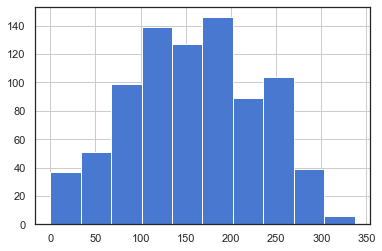

In [117]:
# ce mai mare corelatie, stim de mai sus
living["Overall Survival (Months)"].hist()

---
### <font color = green> Vital Status = Died of Disease</font>

---

In [118]:
died = df[(df["Vital Status"] == 0)]
died.describe()

Breast Cancer Type  Mutation Count  Age at Diagnosis  Cellularity  \
count          645.000000      645.000000        645.000000   645.000000   
mean             1.249612        5.705426         60.457364     1.431008   
std              0.633942        3.403513         13.570272     0.657234   
min              0.000000        1.000000         22.000000     0.000000   
25%              1.000000        4.000000         51.000000     1.000000   
50%              1.000000        5.000000         61.000000     2.000000   
75%              1.000000        7.000000         70.000000     2.000000   
max              4.000000       30.000000         96.000000     2.000000   

       Chemotherapy   ER Status  HER2 Status  Hormone Therapy  \
count    645.000000  645.000000   645.000000       645.000000   
mean       0.308527    0.700775     0.186047         0.603101   
std        0.462244    0.458274     0.389446         0.489634   
min        0.000000    0.000000     0.000000         0.000000   
25%        0.000000    0.000000     0.000000         0.000000   
50%        0.000000    1.000000     0.000000         1.000000   
75%        1.000000    1.000000     0.000000         1.000000   
max        1.000000    1.000000     1.000000         1.000000   

       Inferred Menopausal State  Lymph nodes examined positive  \
count                 645.000000                     645.000000   
mean                    0.241860                       3.305426   
std                     0.428543                       5.322055   
min                     0.000000                       0.000000   
25%                     0.000000                       0.000000   
50%                     0.000000                       1.000000   
75%                     0.000000                       4.000000   
max                     1.000000                      45.000000   

       Neoplasm Histologic Grade  Nottingham prognostic index  \
count                 645.000000                   645.000000   
mean                    2.582946                     4.417054   
std                     0.566690                     1.123446   
min                     1.000000                     1.000000   
25%                     2.000000                     4.000000   
50%                     3.000000                     4.000000   
75%                     3.000000                     5.000000   
max                     3.000000                     6.000000   

       Overall Survival (Months)  Vital Status   PR Status  \
count                 645.000000         645.0  645.000000   
mean                   77.697674           0.0    0.448062   
std                    59.969403           0.0    0.497681   
min                     0.000000           0.0    0.000000   
25%                    34.000000           0.0    0.000000   
50%                    57.000000           0.0    0.000000   
75%                   108.000000           0.0    1.000000   
max                   336.000000           0.0    1.000000   

       Primary Tumor Laterality  Radio Therapy  Tumor Size  Tumor Stage  \
count                645.000000     645.000000  645.000000   645.000000   
mean                   0.570543       0.604651   30.161240     1.958140   
std                    0.495383       0.489305   18.649898     0.578966   
min                    0.000000       0.000000    1.000000     1.000000   
25%                    0.000000       0.000000   20.000000     2.000000   
50%                    1.000000       1.000000   25.000000     2.000000   
75%                    1.000000       1.000000   35.000000     2.000000   
max                    1.000000       1.000000  180.000000     4.000000   

       Type of Breast Surgery  
count              645.000000  
mean                 0.680620  
std                  0.466598  
min                  0.000000  
25%                  0.000000  
50%                  1.000000  
75%                  1.000000  
max                  1.000000

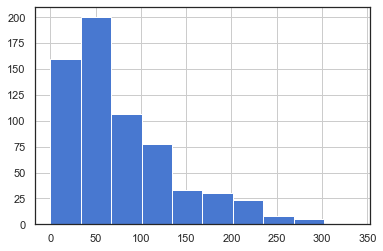

In [119]:
died["Overall Survival (Months)"].hist()

# <font color=purple>**Decision Tree**</font>

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [121]:
dtree = DecisionTreeClassifier
dtree.fit(X_train,Y_train)
predictions = dtree.predict(X_test)

In [122]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67       133
           1       0.73      0.73      0.73       164

    accuracy                           0.70       297
   macro avg       0.70      0.70      0.70       297
weighted avg       0.70      0.70      0.70       297



In [123]:
print(confusion_matrix(Y_test,predictions))

[[ 90  43]
 [ 45 119]]


In [124]:
#Model Evaluation
conf_mat = confusion_matrix(Y_test,predictions)
acc = accuracy_score(Y_test,predictions)
precision = precision_score(Y_test,predictions)
recall = recall_score(Y_test,predictions)
f1= f1_score(Y_test,predictions)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [125]:
#Print Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)
print('\nF-score is: ')
print(f1)

Confusion Matrix is :
[[ 90  43]
 [ 45 119]]

Accuracy is :
0.7037037037037037

Precision is :
0.7345679012345679

Recall is: 
0.725609756097561

F-score is: 
0.7300613496932514


In [129]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

feature_cols = ['Breast Cancer Type', 'Mutation Count', 'Age at Diagnosis',
       'Cellularity', 'Chemotherapy', 'ER Status', 'HER2 Status',
       'Hormone Therapy', 'Inferred Menopausal State',
       'Lymph nodes examined positive', 'Neoplasm Histologic Grade',
       'Nottingham prognostic index', 'Overall Survival (Months)', 'PR Status', 'Primary Tumor Laterality',
       'Radio Therapy', 'Tumor Size', 'Tumor Stage', 'Type of Breast Surgery']

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('breast.png')
Image(graph.create_png())

In [130]:
dtree = DecisionTreeClassifier(criterion="gini", max_depth=3)
dtree.fit(X_train,Y_train)
predictions = dtree.predict(X_test)

In [131]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       133
           1       0.75      0.75      0.75       164

    accuracy                           0.72       297
   macro avg       0.72      0.72      0.72       297
weighted avg       0.72      0.72      0.72       297



In [132]:
print(confusion_matrix(Y_test,predictions))

[[ 92  41]
 [ 41 123]]


In [133]:
#Model Evaluation
conf_mat = confusion_matrix(Y_test,predictions)
acc = accuracy_score(Y_test,predictions)
precision = precision_score(Y_test,predictions)
recall = recall_score(Y_test,predictions)
f1= f1_score(Y_test,predictions)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [134]:
#Print Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)
print('\nF-score is: ')
print(f1)

Confusion Matrix is :
[[ 92  41]
 [ 41 123]]

Accuracy is :
0.7239057239057239

Precision is :
0.75

Recall is: 
0.75

F-score is: 
0.75


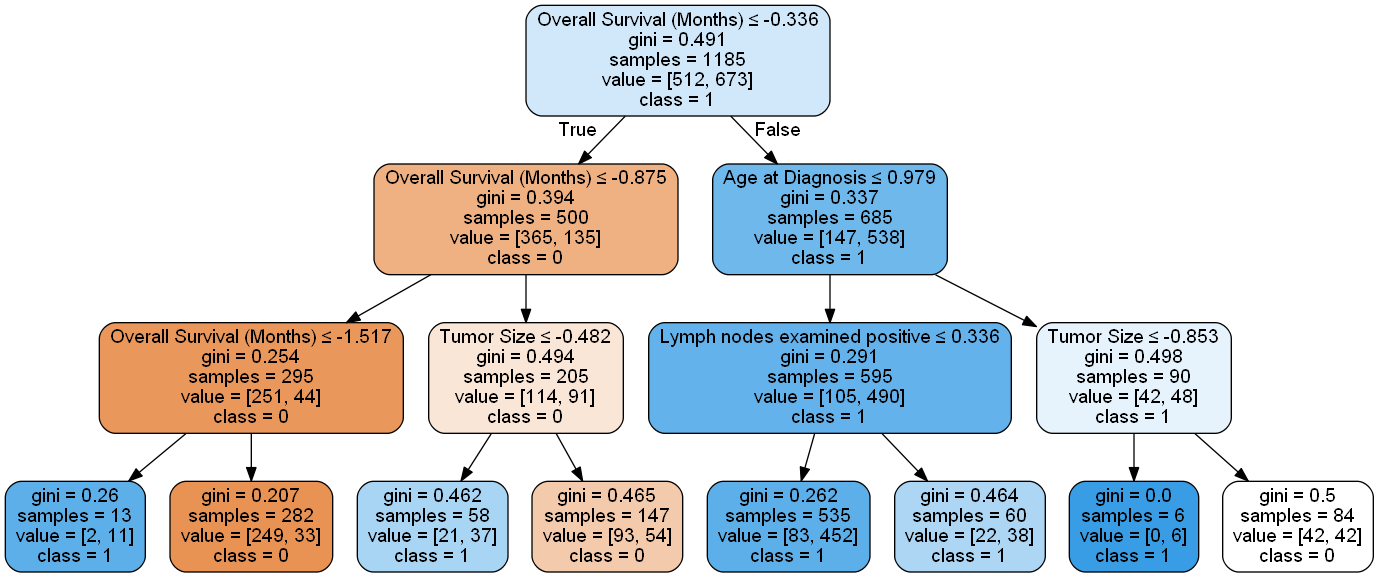

In [135]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

feature_cols = ['Breast Cancer Type', 'Mutation Count', 'Age at Diagnosis',
       'Cellularity', 'Chemotherapy', 'ER Status', 'HER2 Status',
       'Hormone Therapy', 'Inferred Menopausal State',
       'Lymph nodes examined positive', 'Neoplasm Histologic Grade',
       'Nottingham prognostic index', 'Overall Survival (Months)', 'PR Status', 'Primary Tumor Laterality',
       'Radio Therapy', 'Tumor Size', 'Tumor Stage', 'Type of Breast Surgery']

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('breast.png')
Image(graph.create_png())